## IA 340 Mini Research Project

**Research Question:** How have U.S.-Canada and U.S.-Mexico border crossings changed over time by transportation type (trucks, buses, and personal vehicles), and which border shows higher growth in commercial activity since 2020?

## Dataset Documentation

**Source:** https://catalog.data.gov/dataset/border-crossing-entry-data-683ae from the 	Bureau of Transportation Statistics.  
**Description:** This dataset provides monthly summary statistics for inbound border crossings at the U.S.-Canada and U.S.-Mexico borders. It includes port name, state, border type, crossing measure (trucks, buses, pedestrians, etc.), and crossing counts.  
**Time Period:** January 1996 - April 2024.  
**Reason for Choice:** It is a very relevant topic that is mentioned in many current events.

## Importing Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://rickwalder.ia340.bucket.demo/Border_Crossing_Entry_Data.csv')
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


**Datset Description:** This dataset contains the Port Name, State Name, Port Code, Border, Data, Measure, Value, Lat, Long, and the Point for each border crossing recorded. 

## Cleaning Data

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 281444 entries, 0 to 403856
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  281444 non-null  object        
 1   State      281440 non-null  object        
 2   Port Code  281444 non-null  int64         
 3   Border     281444 non-null  object        
 4   Date       281444 non-null  datetime64[ns]
 5   Measure    281444 non-null  object        
 6   Value      281444 non-null  int64         
 7   Latitude   281440 non-null  float64       
 8   Longitude  281440 non-null  float64       
 9   Point      281440 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 23.6+ MB


,Port Code,Date,Value,Latitude,Longitude
count,281444.000000,281444,2.814440e+05,281440.000000,281440.000000
mean,2378.786398,2010-08-20 09:57:11.054134784,4.169711e+04,43.472996,-98.734446
min,101.000000,1996-01-01 00:00:00,1.000000e+00,25.952000,-141.001000
25%,2301.000000,2003-06-01 00:00:00,1.110000e+02,32.718000,-114.728000
50%,3004.000000,2010-07-01 00:00:00,9.580000e+02,46.925000,-100.556000
75%,3323.000000,2017-11-01 00:00:00,8.909250e+03,49.000000,-82.424000
max,3814.000000,2025-08-01 00:00:00,4.447374e+06,62.615000,-66.980000
std,1229.028751,NaN,1.775317e+05,8.281188,18.558819


In [11]:
# Missing values
df = df.dropna(subset=['Value', 'Port Name', 'Measure'])
print("Dropped rows with missing essential values.")

# Remove duplicates
df = df.drop_duplicates()
print(f"Remaining rows: {len(df)}")

# Fix datatypes
df['Date'] = pd.to_datetime(df['Date'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Check for unique borders and measures
print(df['Border'].unique())
print(df['Measure'].unique())

# Filter out zero crossings
df = df[df['Value'] > 0]

Dropped rows with missing essential values.
Remaining rows: 281444
['US-Canada Border' 'US-Mexico Border']
['Trucks' 'Buses' 'Pedestrians' 'Personal Vehicle Passengers'
 'Personal Vehicles' 'Bus Passengers' 'Truck Containers Loaded'
 'Truck Containers Empty' 'Rail Containers Empty' 'Trains'
 'Train Passengers' 'Rail Containers Loaded']


**Explanation**: Dropped missing and duplicate rows, converted Date to datetime and Value to numeric, verified valid categories for Border and Measure, and removed zero-value entries to focus on meaningful crossings.

## Processing and Aggregating Data

In [8]:
# Total crossings by border + month
border_trends = df.groupby(['Border', 'Date'])['Value'].sum().reset_index()

# Percent change from last month
border_trends['PercentChange'] = border_trends.groupby('Border')['Value'].pct_change() * 100

border_trends.head()

,Border,Date,Value,PercentChange
0,US-Canada Border,1996-01-01,9492824,NaN
1,US-Canada Border,1996-02-01,9971650,5.044084
2,US-Canada Border,1996-03-01,10795053,8.257440
3,US-Canada Border,1996-04-01,11771390,9.044300
4,US-Canada Border,1996-05-01,13306955,13.044891


**Explanation:** Creating Percent Change column helps quantify monthly changes, showing how each border’s traffic changes over time, supporting the research question about growth patterns.

## Querying Data

In [5]:
# Since 2020
recent = border_trends[border_trends['Date'] >= '2020-01-01']

# Q: Which border had higher total traffic since 2020?
totals_since_2020 = recent.groupby('Border')['Value'].sum().reset_index()
totals_since_2020

,Border,Value
0,US-Canada Border,321445930
1,US-Mexico Border,1358170502


**Explanation:** This query filters the dataset to include only records from after January 2020 and then aggregates the total number of crossings by border type (Canada vs Mexico). It focuses on the most recent trends and removes historical changes that might harm current patterns. Adding together the Value column for each border allows a direct comparison of total traffic volume between the two borders. The table identifies which border has experienced higher total crossings since 2020, helping address the research question about comparative growth in border activity and trade intensity, but in the post pandemic era.

## Visualizing Data

Matplotlib is building the font cache; this may take a moment.


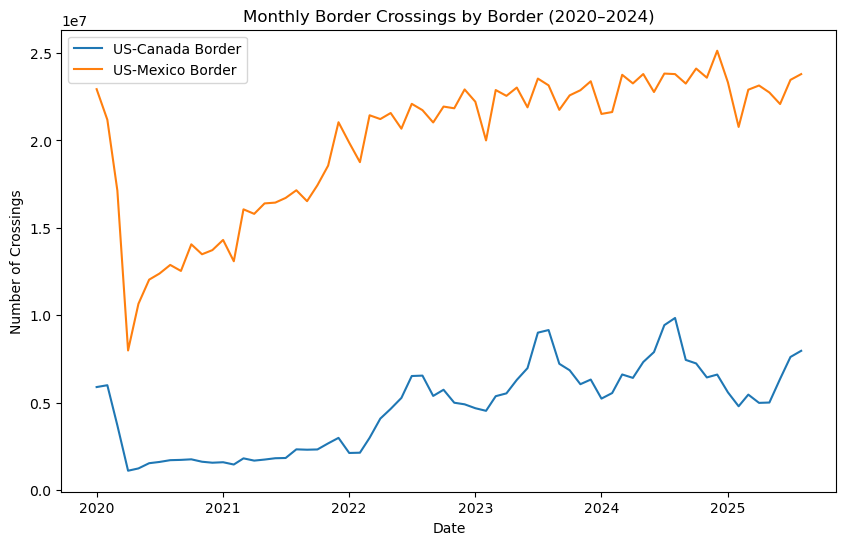

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for border in recent['Border'].unique():
    data = recent[recent['Border'] == border]
    plt.plot(data['Date'], data['Value'], label=border)

plt.title('Monthly Border Crossings by Border (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Number of Crossings')
plt.legend()
plt.show()

**Explanation:** This line chart shows how total monthly crossings have changed over time for the U.S.–Canada and U.S.–Mexico borders from 2020 to 2024. Each line represents a border, allowing for a direct comparison of movement trends over the same period. The visualization highlights seasonal changes in traffic volume, as well as disruptions or recoveries (i.e. declines during early 2020 due to pandemic restrictions and rebounds in later months). Additionally, the U.S.–Mexico border maintains consistently higher crossing counts, suggesting stronger and more continuous trade and travel flows compared to the U.S.–Canada border. This supports the research question by revealing which border has experienced greater post-pandemic recovery and growth in activity.

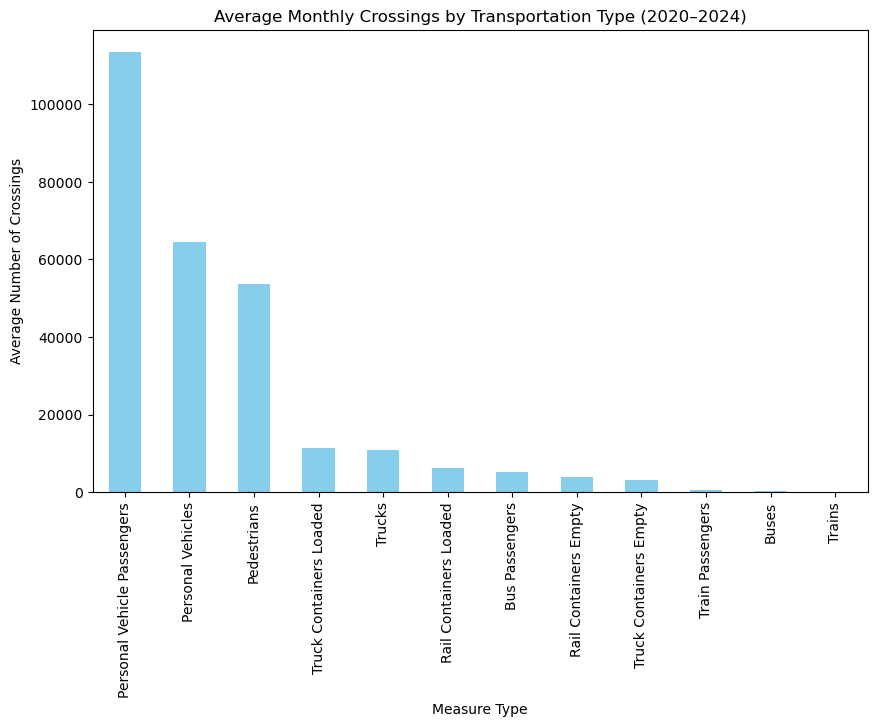

In [7]:
avg_measure = df[df['Date'] >= '2020-01-01'].groupby(['Measure'])['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_measure.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Crossings by Transportation Type (2020–2024)')
plt.xlabel('Measure Type')
plt.ylabel('Average Number of Crossings')
plt.show()

**Explanation:** This bar chart compares the average monthly number of crossings for each transportation measure (i.e., trucks, buses, pedestrians, personal vehicles) between 2020 and 2024. By averaging the data, it smooths out month-to-month fluctuations and highlights which travel modes dominate border traffic overall. The chart provides insight into the composition of border activity: higher averages for truck crossings indicate sustained commercial and freight movement, while lower averages for buses and pedestrians reflect slower recovery in public or leisure travel. This visualization helps explain what types of crossings drive overall traffic differences between borders, reinforcing conclusions about trade intensity and economic dependence across the U.S.–Mexico corridor.